In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("bike.csv")
df.head(1)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16

In [4]:
df["temp"].kurtosis()
df["temp"].kurt()
df["temp"].skew()

0.003690844422472008

In [5]:
df[["temp", "atemp", "humidity"]].kurt()

temp       -0.914530
atemp      -0.850076
humidity   -0.759818
dtype: float64

In [7]:
df = pd.read_csv("krx_202105_utf8.csv")
# df.head(2)

In [8]:
df1 = df.sample(n = 2, random_state = 123)
df2 = df.sample(frac = 0.1, random_state = 123)
print(len(df1))
print(len(df2))

2
55


In [10]:
df_bike = pd.read_csv("bike.csv")

In [13]:
df_bike_sub = df_bike.groupby("season").sample(n = 1, random_state = 123)
df_bike_sub

In [14]:
df_bike["casual"].quantile(0.99) # 제 99 백분위수

240.14999999999964

In [15]:
df_bike["casual"].quantile([0.25, 0.5, 0.75]) # 제 1, 2, 3 사분위수

0.25     4.0
0.50    17.0
0.75    49.0
Name: casual, dtype: float64

### Q. df_bike 객체를 필터링 하시오.
※ registered 변수를 기준으로 필터링 하시오.  
※ registered 변수의 제 1 사분위수 보다 작거나 제 3 사분위수 보다 큰 데이터를 추출  
※ 필터링 결과는 df_bike_out 객체에 저장하시오.

In [24]:
stat_q =  df_bike["registered"].quantile([0.25, 0.75])
stat_q

0.25     36.0
0.75    222.0
Name: registered, dtype: float64

In [20]:
# stat_q[0]
stat_q[0.25]
stat_q.iloc[0]
stat_q.values[0]

4.0

In [23]:
stat_q1 =  df_bike["registered"].quantile(0.25)
stat_q3 =  df_bike["registered"].quantile(0.75)
stat_q3

222.0

In [25]:
cond_1 = df_bike["registered"] < stat_q1
cond_2 = df_bike["registered"] > stat_q3

In [26]:
df_bike_sub = df_bike.loc[cond_1 | cond_2, ]

In [27]:
len(df_bike_sub)

5427

In [35]:
df_krx = pd.read_csv("krx_202105_utf8_missing.csv")
df_krx.head()

### Q1. 각 변수별 결측치 개수를 확인하시오.

In [33]:
df_krx.isna().sum()

### Q2. 등락률 변수의 원소가 결측인 row를 제외한 나머지 row를 df_krx_notna 객체에 저장하시오.

In [41]:
df_krx_notna = df_krx.loc[df_krx["등락률"].notna(), ]
df_krx_notna = df_krx.loc[df_krx["등락률"].isna() == False, ]

In [51]:
df_krx_notna = df_krx_notna.dropna()
df_krx_notna.iloc[[1, 3, 4], 3] = pd.NA
df_krx_notna = df_krx_notna.reset_index(drop = True)

In [ ]:
# df_krx_notna["등락률"] = df_krx_notna["대비"] / df_krx_notna["종가"] * 100

In [53]:
df_krx_notna1 = df_krx_notna.loc[df_krx_notna["등락률"].isna(), ]
df_krx_notna2 = df_krx_notna.loc[df_krx_notna["등락률"].notna(), ]

In [57]:
df_krx_notna1["등락률"] = df_krx_notna1["대비"] / df_krx_notna1["종가"] * 100
df_krx_notna1

In [59]:
df_krx_notna = pd.concat([df_krx_notna1, df_krx_notna2])
df_krx_notna = df_krx_notna.sort_index()
df_krx_notna.head()

지수명       종가      대비       등락률       시가       고가       저가  \
0   KRX 100  6624.66  -29.51     -0.44  6656.43  6722.06  6607.57   
1  KRX 헬스케어  4228.09 -202.48 -4.788924  4426.61  4444.53  4226.61   
2  KRX 방송통신   907.58   10.35      1.15   897.89   919.11   895.21   
3    KRX 건설   717.21  -10.53 -1.468189   726.53   733.75   713.55   
4    KRX 증권   855.13  -29.81  -3.48602   884.94   885.48   848.69   

           거래량          거래대금        상장시가총액          날짜  
0  125958178.0  9.134221e+12  1.698358e+15  20210503.0  
1   47562260.0  2.648351e+12  2.018371e+14  20210503.0  
2   22648949.0  1.840892e+11  4.108857e+13  20210503.0  
3   26974805.0  5.108257e+11  4.604520e+13  20210503.0  
4   44309665.0  2.877070e+11  3.064399e+13  20210503.0

In [60]:
df_krx_notna.iloc[[1, 3, 4], 3] = pd.NA

In [63]:
cond = df_krx_notna["등락률"].isna()
df_krx_notna.loc[cond, "등락률"] = df_krx_notna.loc[cond , "대비"] / df_krx_notna.loc[cond , "종가"] * 100

In [64]:
df_krx_notna.head()

지수명       종가      대비       등락률       시가       고가       저가  \
0   KRX 100  6624.66  -29.51     -0.44  6656.43  6722.06  6607.57   
1  KRX 헬스케어  4228.09 -202.48 -4.788924  4426.61  4444.53  4226.61   
2  KRX 방송통신   907.58   10.35      1.15   897.89   919.11   895.21   
3    KRX 건설   717.21  -10.53 -1.468189   726.53   733.75   713.55   
4    KRX 증권   855.13  -29.81  -3.48602   884.94   885.48   848.69   

           거래량          거래대금        상장시가총액          날짜  
0  125958178.0  9.134221e+12  1.698358e+15  20210503.0  
1   47562260.0  2.648351e+12  2.018371e+14  20210503.0  
2   22648949.0  1.840892e+11  4.108857e+13  20210503.0  
3   26974805.0  5.108257e+11  4.604520e+13  20210503.0  
4   44309665.0  2.877070e+11  3.064399e+13  20210503.0

### Q3. 등락률 변수의 원소가 결측치인 row를 df_krx_na 객체에 저장하시오.

In [37]:
df_krx_na = df_krx.loc[df_krx["등락률"].isna(), ]
df_krx_na = df_krx.loc[df_krx["등락률"].notna() == False, ]

In [38]:
df_krx_na

지수명        종가     대비  등락률        시가        고가        저가  \
1          KTOP 30  11520.28    NaN  NaN  11609.44  11702.14  11490.84   
3              NaN       NaN    NaN  NaN       NaN       NaN       NaN   
5              NaN       NaN    NaN  NaN       NaN       NaN       NaN   
18  KRX 미디어&엔터테인먼트   3365.88 -17.99  NaN   3389.00   3421.21   3355.75   

           거래량          거래대금        상장시가총액          날짜  
1   50048566.0  5.645660e+12  1.208344e+15  20210503.0  
3          NaN           NaN           NaN         NaN  
5          NaN           NaN           NaN         NaN  
18  10599593.0  9.628609e+11  1.735356e+14  20210503.0

In [66]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("AWS_sample.txt", sep = "#")
df.head(2)

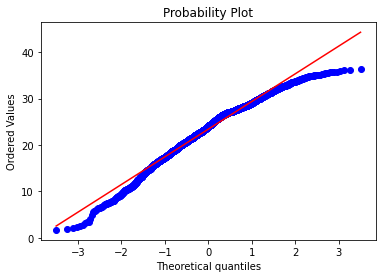

In [78]:
df_sub = df.loc[df["AWS_ID"] == 108, ].reset_index(drop = True)
probplot(df_sub["TA"], plot = plt);

<AxesSubplot:ylabel='Frequency'>

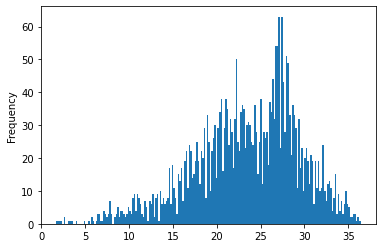

In [77]:
df_sub["TA"].plot.hist(bins = 200)

In [79]:
from scipy.stats import shapiro

In [80]:
shapiro(df_sub["TA"])

ShapiroResult(statistic=0.9790797233581543, pvalue=2.0592336616493712e-20)

In [81]:
stat, p = shapiro(df_sub["TA"])
print(round(stat, 4)) # 검정통계량
print(round(p, 4)) # p-value

0.9791
0.0


df_sub객체의 "TA" 변수의 원소를 대상으로 정규성 검정(Shapiro-Wilk test)을 실시하여 검정통계량은 0.9791, p-value는 0으로 계산되었다. 유의수준이 5%(0.05)일 때, p-value가 유의수준 보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다.  
즉, 주어진 데이터는 정규분포를 따른다고 보기 어렵다. (정규분포와 다름)

In [82]:
import numpy as np

In [83]:
np.random.seed(123)
nums = np.random.normal(loc = 0, scale = 1, size = 200)
stat, p = shapiro(nums)
print(round(stat, 4))
print(round(p, 4))

0.996
0.8792


nums 객체의 원소를 대상으로 정규성 검정(Shapiro-Wilk test)을 실시하여 검정통계량은 0.996, p-value는 0.8792으로 계산되었다. 유의수준이 5%(0.05)일 때, p-value가 유의수준 보다 크기 때문에 귀무가설을 기각하기 어렵다.  
즉, 주어진 데이터는 정규분포를 따른다고 할 수 있다.

<AxesSubplot:ylabel='Frequency'>

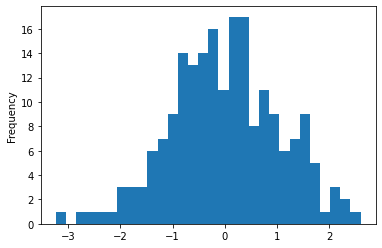

In [84]:
pd.Series(nums).plot.hist(bins = 30)